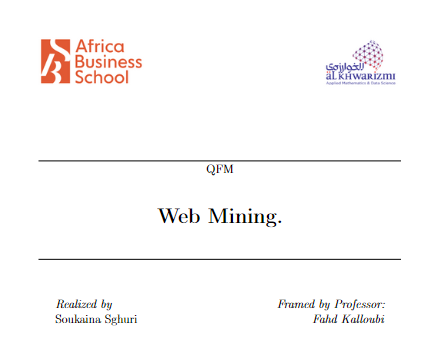

# PART 1


As part of this project, I performed a web scraping task to extract data from the IMDb (Internet Movie Database) website. The main objective was to collect information about the top movies of the year 2023, such as their title, release year, IMDb rating, and Metascore.

First , we start by importing the required packages

In [50]:
import bs4
import requests
import time
import random as ran
import sys
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In this code, we have specified the URL of the IMDb page that we want to scrape. The provided URL corresponds to the search for movies released between January 1, 2023, and December 31, 2023, sorted by box office gross (boxoffice_gross_us) in ascending order (asc).

In [51]:
url = 'https://www.imdb.com/search/title/?release_date=2023-01-01,2023-12-31&sort=boxoffice_gross_us,asc'
source = requests.get(url).text
#print(source)



In this code, we are using the BeautifulSoup library from bs4 to parse the HTML content.

In [52]:
soup = bs4.BeautifulSoup(source,'html.parser')
#print(soup)

In [5]:
soup.title

<title>Released between 2023-01-01 and 2023-12-31
(Sorted by US Box Office Ascending) - IMDb</title>


These lines of code allow us to iterate through the list of movies and extract the title and rating of each film.

In [53]:
movie_list = soup.find_all('div', class_='lister-item-content')
for movie in movie_list:
    title = movie.h3.a.text
    rating_element = movie.find('div', class_='ratings-imdb-rating')
    if rating_element is not None:
        rating = rating_element.strong.text
    else:
        rating = 'N/A'
    print(f"Title: {title} | Rating: {rating}")

Title: Trinket Box | Rating: 7.8
Title: R BnB | Rating: 9.0
Title: Guardians of the Galaxy Vol. 3 | Rating: 8.2
Title: Fast X | Rating: 6.3
Title: The Mother | Rating: 5.5
Title: Silo | Rating: 8.2
Title: Air | Rating: 7.5
Title: Queen Cleopatra | Rating: 1.0
Title: Queen Charlotte: A Bridgerton Story | Rating: 7.1
Title: The Super Mario Bros. Movie | Rating: 7.2
Title: Dungeons & Dragons: Honor Among Thieves | Rating: 7.3
Title: Evil Dead Rise | Rating: 6.8
Title: Guy Ritchie's the Covenant | Rating: 7.6
Title: Love & Death | Rating: 7.6
Title: Killers of the Flower Moon | Rating: N/A
Title: Five Nights at Freddy's | Rating: N/A
Title: The Little Mermaid | Rating: 7.0
Title: Ant-Man and the Wasp: Quantumania | Rating: 6.2
Title: The Diplomat | Rating: 8.1
Title: Mission: Impossible - Dead Reckoning Part One | Rating: N/A
Title: Citadel | Rating: 6.1
Title: Jeanne du Barry | Rating: 6.8
Title: Jury Duty | Rating: 8.4
Title: Indiana Jones and the Dial of Destiny | Rating: N/A
Title: Bla

In [54]:
movie_blocks = soup.findAll('div', {'class': 'lister-item-content'})
#print(first_movie_block)

This block of code iterates through each movie block in the movie_blocks list. For each movie, it extracts the title, release year, IMDb rating, Metascore (if available), and the number of votes.

In [55]:
for movie in movie_blocks:
    title = movie.h3.a.text
    year = int(movie_blocks[0].find('span', {'class': 'lister-item-year'}).contents[0][1:-1])  # Release year
    rating = float(movie_blocks[0].find('div',{'class':'inline-block ratings-imdb-rating'}).get('data-value')) #rating
    votes = int(movie_blocks[0].find('span', {'name': 'nv'}).get('data-value'))  # votes
    metascore_element = movie.find('span', class_='metascore')
    
    if metascore_element is not None:
        metascore = int(metascore_element.text.strip())
    else:
        metascore = None

    print("Movie Name: " + title,
          "\nRelease Year: " + str(year),
          "\nIMDb Rating: " + str(rating),
          "Meta Score: " + (str(metascore) if metascore is not None else "NONE"),
          "\nVotes: " + '{:,}'.format(votes))
    print()


Movie Name: Trinket Box 
Release Year: 2023 
IMDb Rating: 7.8 Meta Score: NONE 
Votes: 59

Movie Name: R BnB 
Release Year: 2023 
IMDb Rating: 7.8 Meta Score: NONE 
Votes: 59

Movie Name: Guardians of the Galaxy Vol. 3 
Release Year: 2023 
IMDb Rating: 7.8 Meta Score: 64 
Votes: 59

Movie Name: Fast X 
Release Year: 2023 
IMDb Rating: 7.8 Meta Score: 55 
Votes: 59

Movie Name: The Mother 
Release Year: 2023 
IMDb Rating: 7.8 Meta Score: 45 
Votes: 59

Movie Name: Silo 
Release Year: 2023 
IMDb Rating: 7.8 Meta Score: NONE 
Votes: 59

Movie Name: Air 
Release Year: 2023 
IMDb Rating: 7.8 Meta Score: 73 
Votes: 59

Movie Name: Queen Cleopatra 
Release Year: 2023 
IMDb Rating: 7.8 Meta Score: NONE 
Votes: 59

Movie Name: Queen Charlotte: A Bridgerton Story 
Release Year: 2023 
IMDb Rating: 7.8 Meta Score: NONE 
Votes: 59

Movie Name: The Super Mario Bros. Movie 
Release Year: 2023 
IMDb Rating: 7.8 Meta Score: 46 
Votes: 59

Movie Name: Dungeons & Dragons: Honor Among Thieves 
Release Yea

In [56]:
def scrape_mblock(movie_block):
    movieb_data ={}
    try:
        movieb_data['name'] = movie_block.find('a').get_text() # Name of the movie
    except:
        movieb_data['name'] = None
    try:    
        movieb_data['year'] = str(movie_block.find('span',{'class': 'lister-item-year'}).contents[0][1:-1]) # Release year
    except:
        movieb_data['year'] = None
    try:
        movieb_data['rating'] = float(movie_block.find('div',{'class':'inline-block ratings-imdb-rating'}).get('data-value')) #rating
    except:
        movieb_data['rating'] = None
    try:
        movieb_data['m_score'] = float(movie_block.find('span',{'class':'metascore favorable'}).contents[0].strip()) #meta score
    except:
        movieb_data['m_score'] = None
    try:
        movieb_data['votes'] = int(movie_block.find('span',{'name':'nv'}).get('data-value')) # votes
    except:
        movieb_data['votes'] = None

    return movieb_data
    

In [57]:
def scrape_m_page(movie_blocks):
    
    page_movie_data = []
    num_blocks = len(movie_blocks)
    
    for block in range(num_blocks):
        page_movie_data.append(scrape_mblock(movie_blocks[block]))
    
    return page_movie_data

In [58]:
def scrape_this(link,t_count):
    
    #from IPython.core.debugger import set_trace

    base_url = link
    target = t_count
    
    current_mcount_start = 0
    current_mcount_end = 0
    remaining_mcount = target - current_mcount_end 
    
    new_page_number = 1
    
    movie_data = []
    
    
    while remaining_mcount > 0:
        url = base_url + str(new_page_number)
        #set_trace()
        source = requests.get(url).text
        soup = bs4.BeautifulSoup(source,'html.parser') 
        movie_blocks = soup.findAll('div',{'class':'lister-item-content'}) 
        movie_data.extend(scrape_m_page(movie_blocks))    
        current_mcount_start = int(soup.find("div", {"class":"nav"}).find("div", {"class": "desc"}).contents[1].get_text().split("-")[0])
        current_mcount_end = int(soup.find("div", {"class":"nav"}).find("div", {"class": "desc"}).contents[1].get_text().split("-")[1].split(" ")[0])
        remaining_mcount = target - current_mcount_end
        print('\r' + "currently scraping movies from: " + str(current_mcount_start) + " - "+str(current_mcount_end), "| remaining count: " + str(remaining_mcount), flush=True, end ="")
        new_page_number = current_mcount_end + 1
        time.sleep(ran.randint(0, 10))
    return movie_data    

This code performs web scraping to extract information about the top movies of the year 2023. It retrieves 50 movies and stores the extracted data in a list.

Then, it displays the movie information in the form of a DataFrame table using the pandas library. This organizes and visualizes the data in a tabular format, making it easier to analyze and manipulate the data further.

In [59]:
base_scraping_link = "https://www.imdb.com/search/title/?release_date=2023-01-01,2023-12-31&sort=boxoffice_gross_us,asc"
top_movies = 50 #input("How many movies do you want to scrape?")
films = []
films = scrape_this(base_scraping_link,int(top_movies))
print('\r'+"List of top " + str(top_movies) +" movies:" + "\n", end="\n")
df= pd.DataFrame(films)


List of top 50 movies:ies from: 1 - 50 | remaining count: 0



In [60]:
df.tail()

,name,year,rating,m_score,votes
45,Renfield,2023,6.4,NaN,37986.0
46,Mrs. Davis,2023,7.3,NaN,5540.0
47,Peter Pan & Wendy,2023,4.2,61.0,21441.0
48,Ghosted,I) (2023,5.8,NaN,39552.0
49,Spider-Man: Across the Spider-Verse,2023,NaN,NaN,NaN


The visualizations in the code provide a clear and intuitive representation of the movie ratings and their distribution. By presenting the data in graphical form, users can easily perceive the overall trends, patterns, and proportions of different rating categories

In [61]:
# Calculate rating counts
rating_counts = df['rating'].value_counts()

# Create pie chart for rating distribution
fig_pie = go.Figure(data=go.Pie(
    labels=df['name'] + ' (' + df['rating'].astype(str) + ')',
    values=rating_counts.values,
    marker=dict(colors=['skyblue', 'lightgreen', 'purple', 'orange']),
    hole=0.4,
    hoverinfo='label+text+value'
))
fig_pie.update_layout(
    title={
        'text': 'Rating Distribution',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'color': 'white'}
    },
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

# Initialize the app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.Div(children='Exploring the Top Movies of 2023', style={'textAlign': 'center', 'font-weight': 'bold', 'background-color': 'gray', 'padding': '10px'}),
    dash_table.DataTable(
        data=df.to_dict('records'),
        columns=[{'name': col, 'id': col} for col in df.columns],
        page_size=10
    ),
    html.Div(children=[
        html.Div(children=[
            html.H3('Top Rated Movies'),
            dcc.Graph(figure=fig_rating)
        ], className='six columns'),
        html.Div(children=[
            html.H3('Top Voted Movies'),
            dcc.Graph(figure=fig_vote)
        ], className='six columns'),
        html.Div(children=[
            html.H3('Rating Distribution'),
            dcc.Graph(figure=fig_pie)
        ], className='six columns')
    ], className='row')
])

#
# Run the app
if __name__ == '__main__':
    app.run_server(debug=False)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [28/May/2023 17:14:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2023 17:14:10] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2023 17:14:10] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2023 17:14:10] "GET /_dash-component-suites/dash/dash_table/async-highlight.js HTTP/1.1" 304 -
127.0.0.1 - - [28/May/2023 17:14:10] "GET /_dash-component-suites/dash/dash_table/async-table.js HTTP/1.1" 304 -
127.0.0.1 - - [28/May/2023 17:14:10] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [28/May/2023 17:14:10] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -


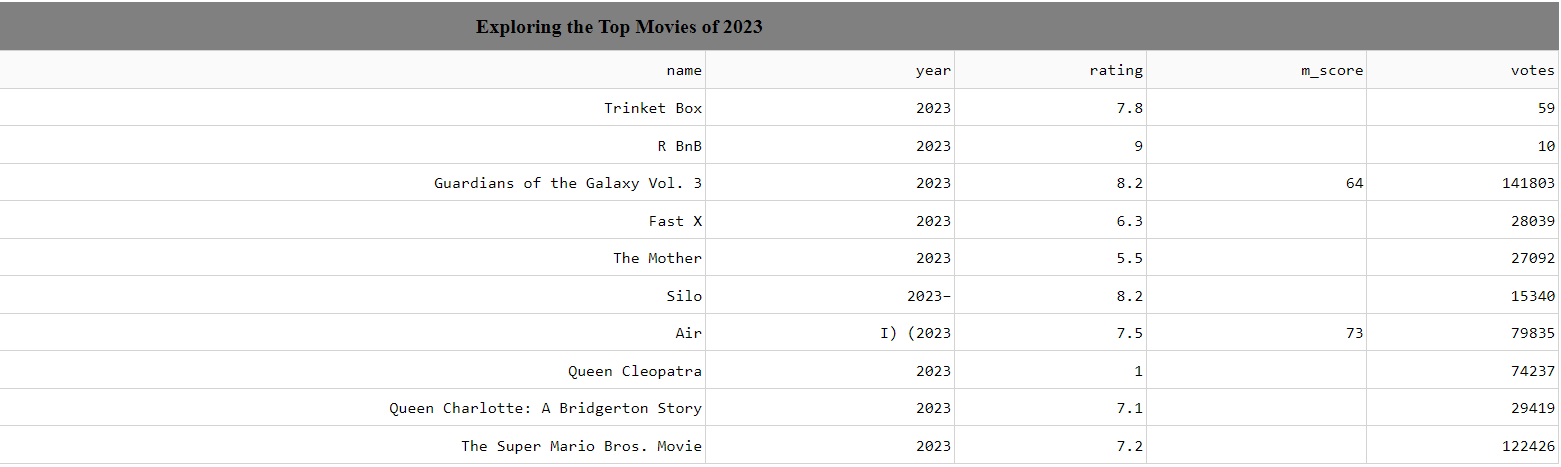

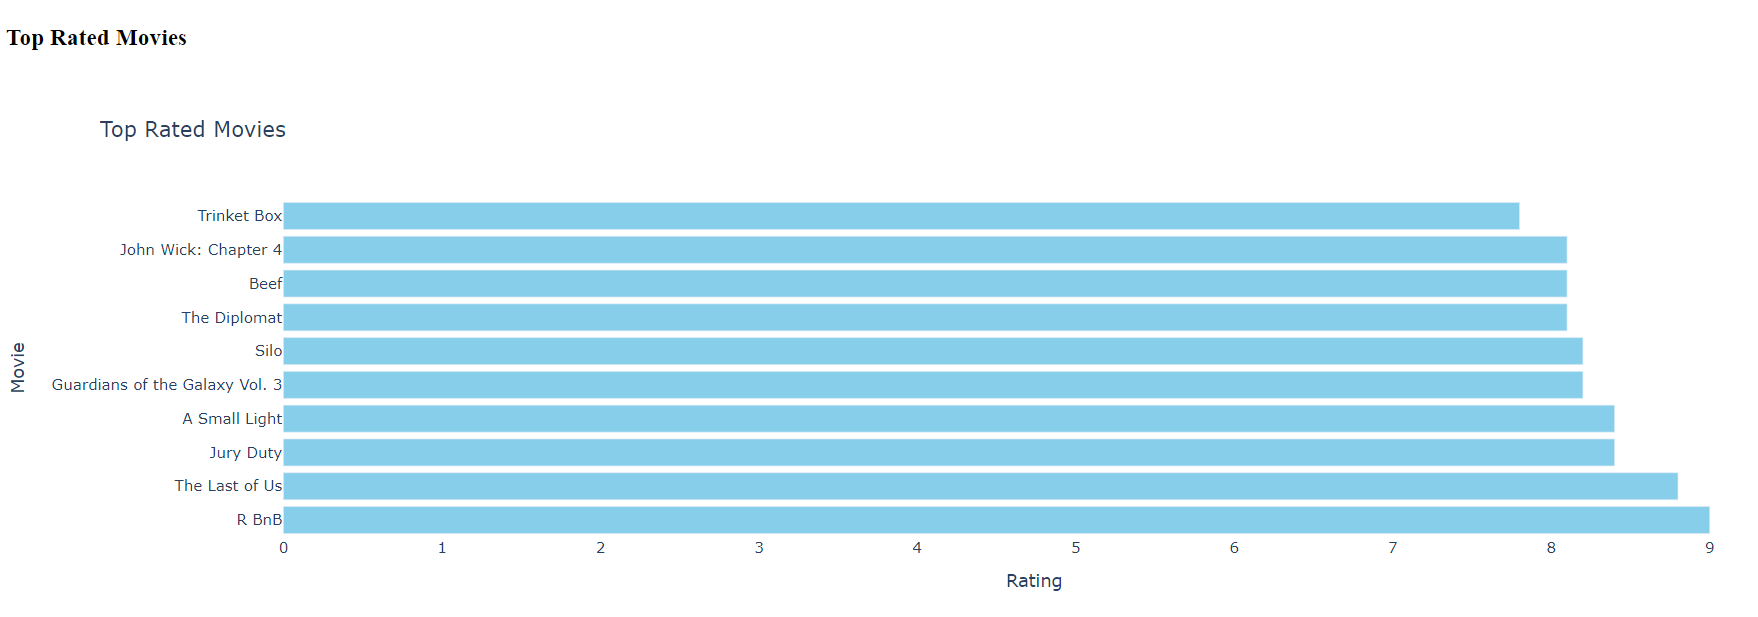

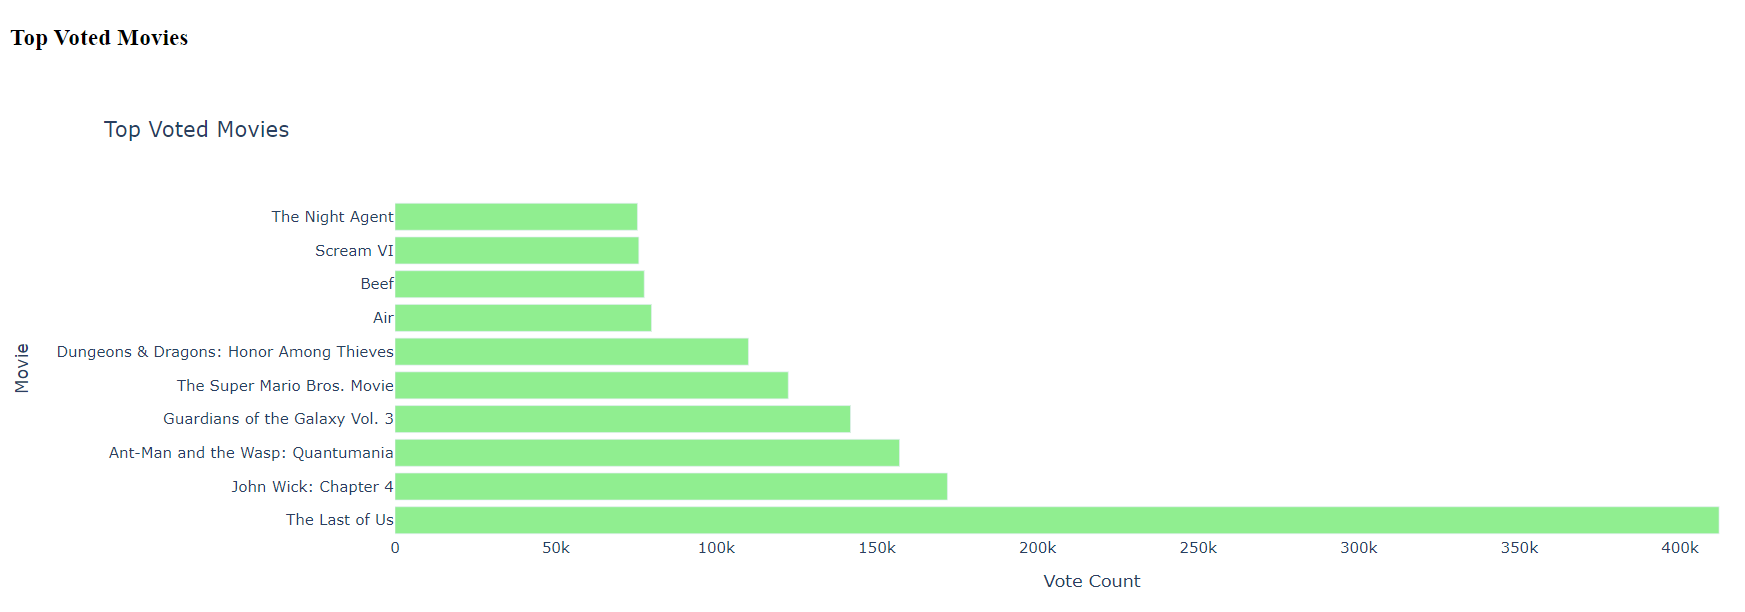

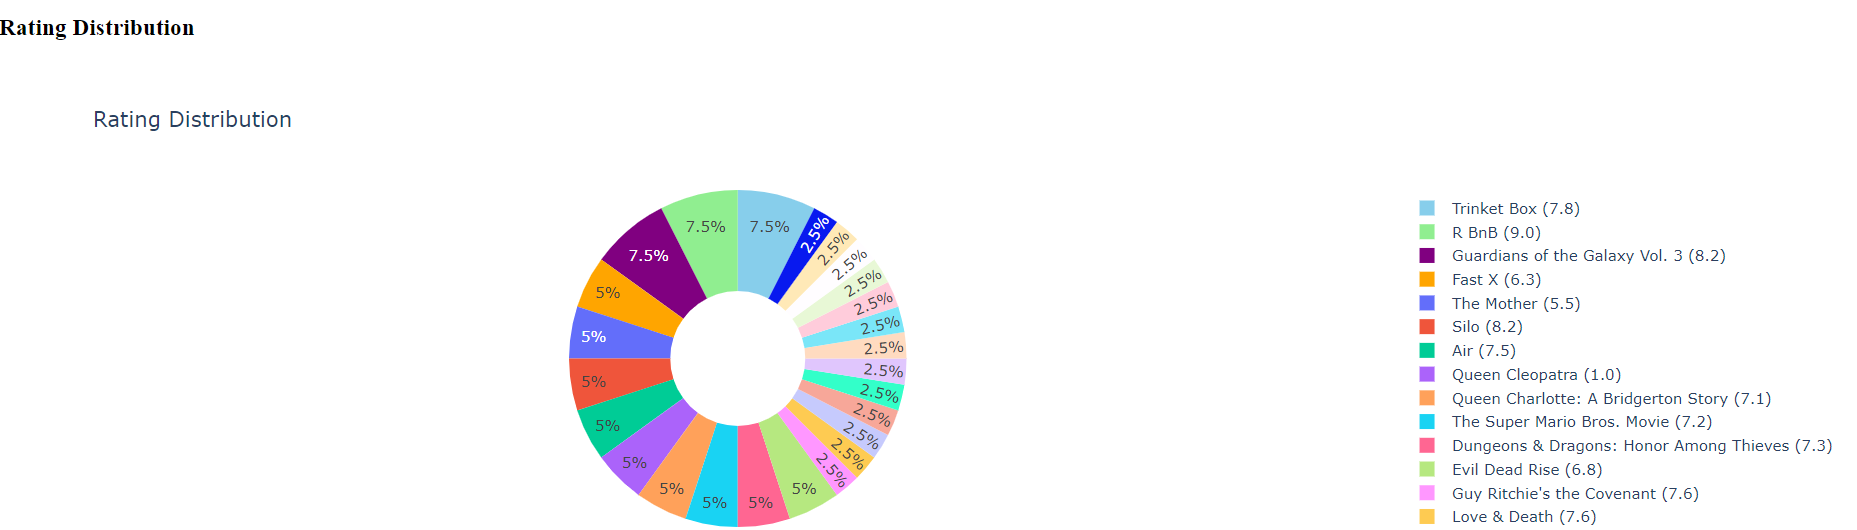

# PART 2

In [66]:
url = 'https://www.imdb.com/chart/moviemeter'
response = requests.get(url)
soup = bs4.BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', {'class': 'chart full-width'})

rows = table.find_all('tr')[1:]

titles = []
years = []
ratings = []
ratings = []

for row in rows:
    title = row.find('td', {'class': 'titleColumn'}).find('a').text
    titles.append(title)
    year = row.find('span', {'class': 'secondaryInfo'}).text.strip('()')
    years.append(year)
    rating_element = row.find('td', {'class': 'ratingColumn'}).find('strong')
    
    if rating_element:
        rating = rating_element.text
    else:
        rating = None
    ratings.append(rating)
    
data = pd.DataFrame({'Title': titles, 'Year': years, 'Rating': ratings})

In [67]:
data.head()

,Title,Year,Rating
0,Guardians of the Galaxy Vol. 3,2023,8.2
1,Fast X,2023,6.3
2,The Mother,2023,5.5
3,Air,2023,7.5
4,The Super Mario Bros. Movie,2023,7.2


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   100 non-null    object
 1   Year    100 non-null    object
 2   Rating  84 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB


In [79]:

# Sorting the data based on rating
sorted_data = data.sort_values('Rating', ascending=False)
top_movies = sorted_data.head(10)

fig_rating = go.Figure(data=[
    go.Bar(x=top_movies['Rating'], y=top_movies['Title'], orientation='h', marker_color='rgb(31, 119, 180)')
])
fig_rating.update_layout(title='Top Rated Movies', xaxis_title='Rating', yaxis_title='Movie')

# Sorting the data based on year
sorted_data = data.sort_values('Year')
oldest_movies = sorted_data.head(10)

fig_rating1 = go.Figure(data=[
    go.Bar(x=oldest_movies['Rating'], y=oldest_movies['Title'], orientation='h', marker_color='rgb(255, 127, 14)')
])
fig_rating1.update_layout(title='The Rating of Oldest Movies', xaxis_title='Rating', yaxis_title='Movie')

fig_histogram = go.Figure(data=[
    go.Histogram(x=data['Rating'], marker_color='rgb(214, 39, 40)')
])
fig_histogram.update_layout(title='Histogram of Movie Ratings', xaxis_title='Rating', yaxis_title='Count')

fig_box = go.Figure(data=[
    go.Box(y=data['Rating'], marker_color='rgb(148, 103, 189)')
])
fig_box.update_layout(title='Box Plot of Ratings', yaxis_title='Rating')

# Initialize the app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.Div(children='Exploring movies od 2023'),
    dash_table.DataTable(data=data.to_dict('records'), page_size=10),
    html.Div(children=[
        html.Div(children=[
            html.H3('Top Rated Movies'),
            dcc.Graph(figure=fig_rating)
        ], className='six columns'),
        html.Div(children=[
            html.H3('Oldest Movies - Top Rated'),
            dcc.Graph(figure=fig_rating1)
        ], className='six columns'),
        html.Div(children=[
            html.H3('Histogram of Movie Ratings'),
            dcc.Graph(figure=fig_histogram)
        ], className='six columns'),
        html.Div(children=[
            html.H3('Box Plot'),
            dcc.Graph(figure=fig_box)
        ], className='six columns')
    ], className='row')
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [28/May/2023 17:49:40] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2023 17:49:40] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2023 17:49:40] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2023 17:49:41] "GET /_dash-component-suites/dash/dash_table/async-highlight.js HTTP/1.1" 304 -
127.0.0.1 - - [28/May/2023 17:49:41] "GET /_dash-component-suites/dash/dash_table/async-table.js HTTP/1.1" 304 -
127.0.0.1 - - [28/May/2023 17:49:41] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [28/May/2023 17:49:41] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -


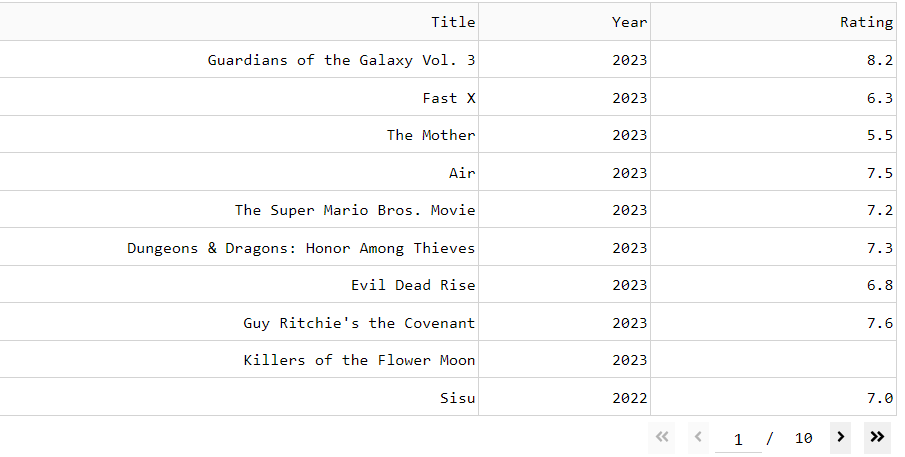

The visualizations in the code provide a clear and intuitive representation of the movie ratings and their distribution. By presenting the data in graphical form, users can easily perceive the overall trends, patterns, and proportions of different rating categories

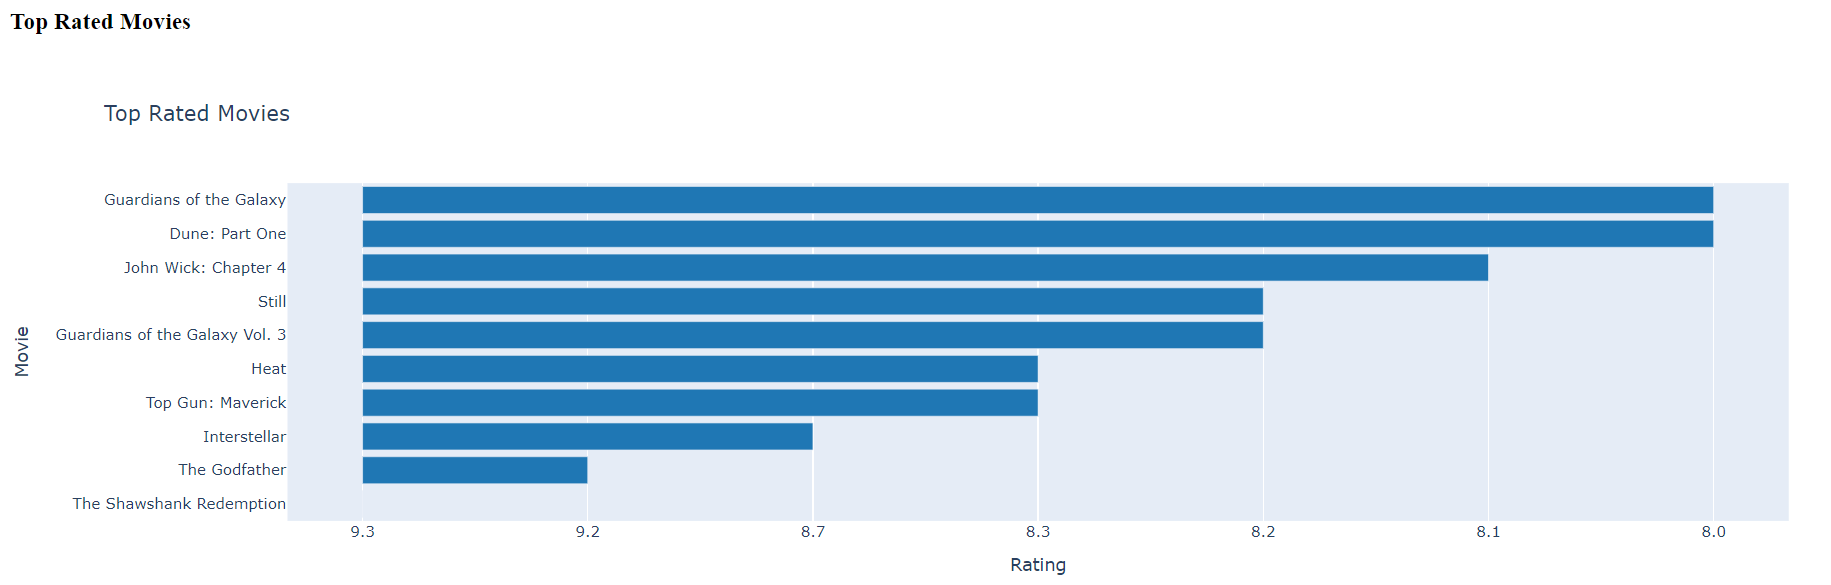

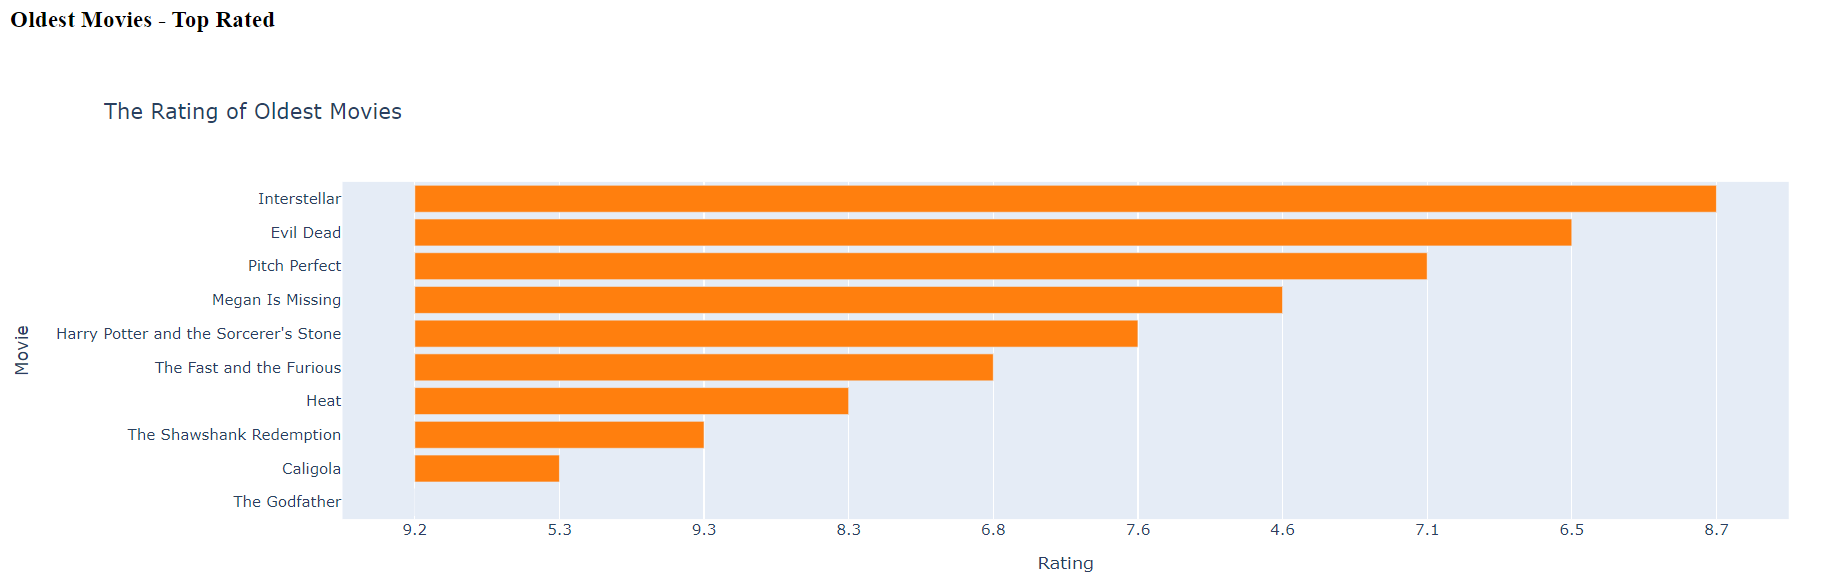

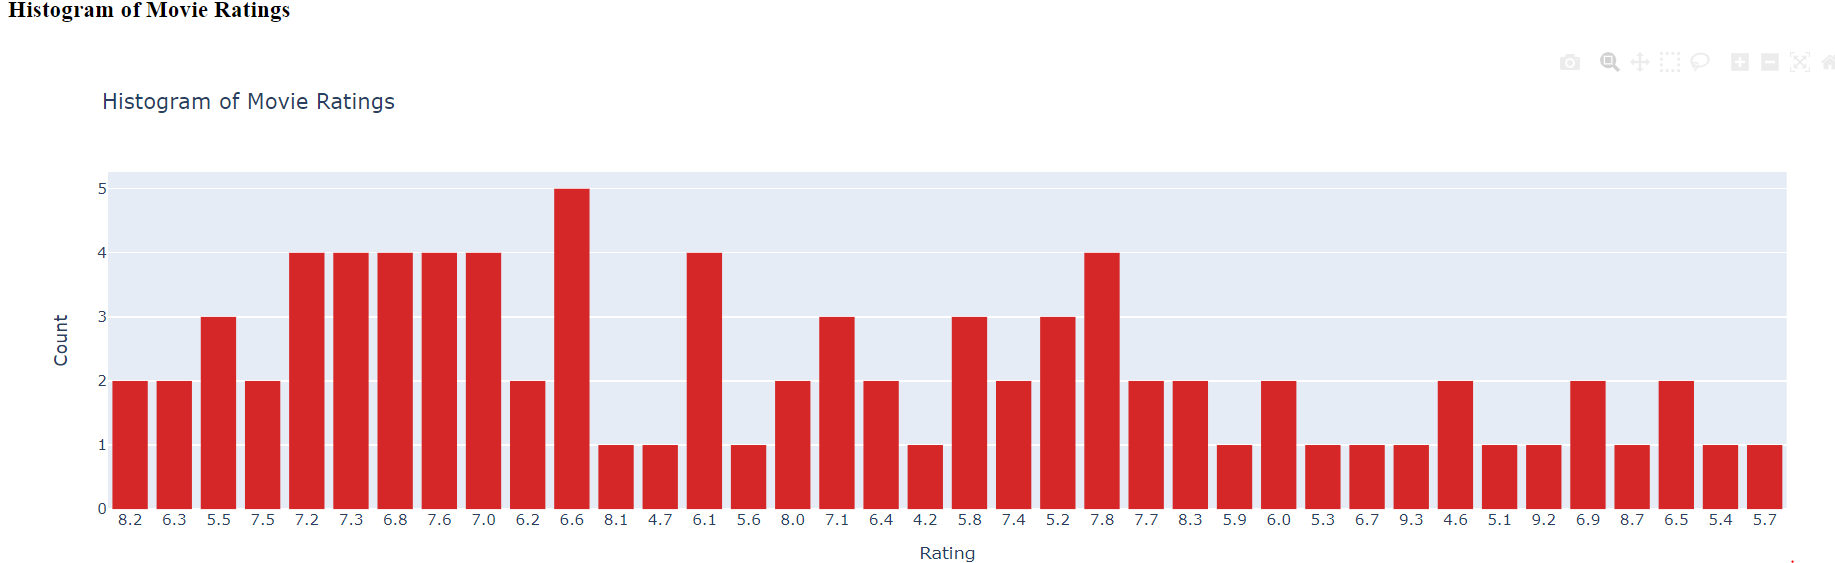

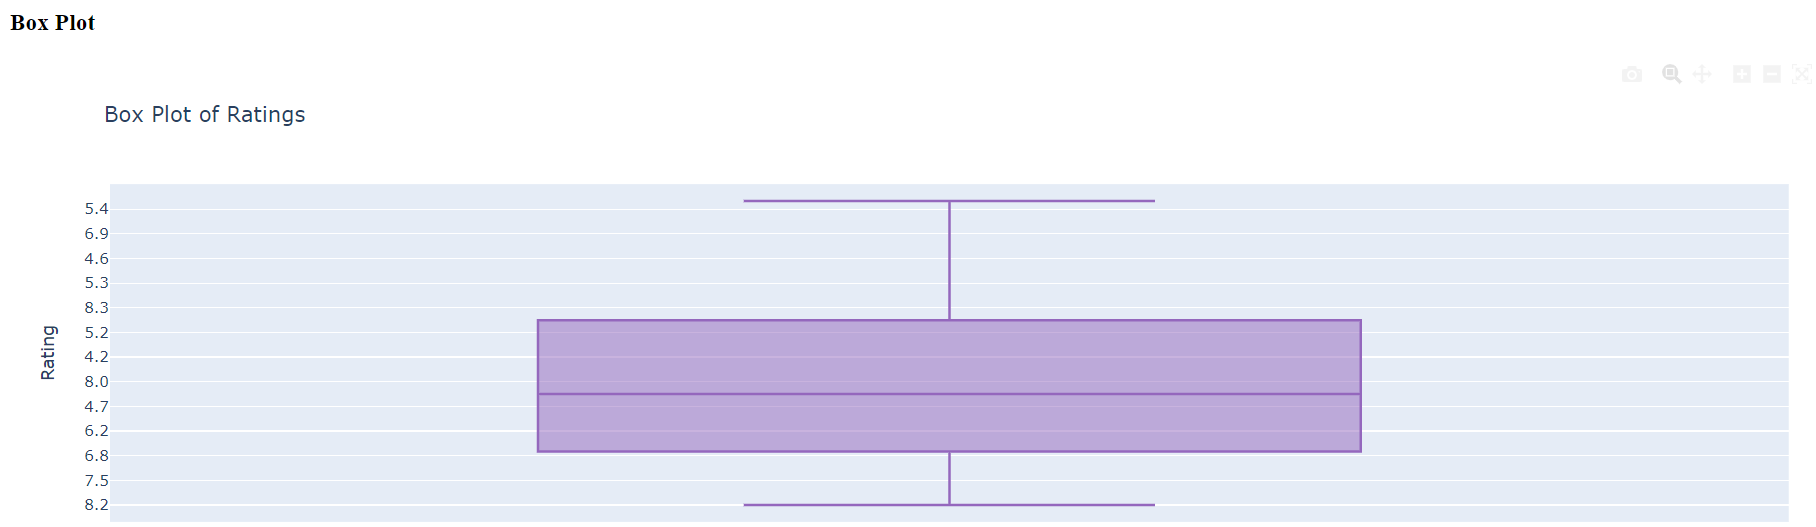